In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime
from datetime import datetime, timedelta


In [3]:
data = pd.read_csv("cleaned_data.csv", index_col=0)

In [4]:
data.shape

(158723, 17)

In [5]:
data.head()

,ISIN,MarketSegment,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades
0,DE000C1W2M60,ODX2,EUR,OPT,20211112.0,16100.0,Put,ODX2 SI 20211112 CS EU P 16100 0,1.0,2021-11-09,10:33,76.50,76.50,76.50,76.50,1.0,1.0
1,DE000C0PLE53,OESX,EUR,OPT,20211217.0,4200.0,Put,OESX SI 20211217 CS EU P 4200 0,1.0,2021-11-09,11:26,36.80,36.80,36.80,36.80,201.0,2.0
2,DE000C1WYZT5,SZG,EUR,OPT,20220121.0,34.0,Call,SZG SI 20220121 PS AM C 34.00 0,4.0,2021-11-09,13:14,1.49,1.49,1.49,1.49,5.0,1.0
3,DE000C1W2BL4,OGB2,EUR,OPT,20211112.0,170.5,Put,OGB2 SI 20211112 PS AM P 170.50 0,1.0,2021-11-09,13:22,0.17,0.17,0.17,0.17,1.0,1.0
4,DE000C6CMZQ7,OKS2,KRW,OPT,20211111.0,397.5,Call,OKS2 SI 20211111 CS EU C 397.5 0,1.0,2021-11-09,13:33,0.29,0.30,0.29,0.30,3.0,3.0


In [6]:
eurdata = data[data['Currency']=='EUR']

In [7]:
eurdata.shape

(87409, 17)

In [8]:
eurdata.head()

,ISIN,MarketSegment,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades
0,DE000C1W2M60,ODX2,EUR,OPT,20211112.0,16100.0,Put,ODX2 SI 20211112 CS EU P 16100 0,1.0,2021-11-09,10:33,76.50,76.50,76.50,76.50,1.0,1.0
1,DE000C0PLE53,OESX,EUR,OPT,20211217.0,4200.0,Put,OESX SI 20211217 CS EU P 4200 0,1.0,2021-11-09,11:26,36.80,36.80,36.80,36.80,201.0,2.0
2,DE000C1WYZT5,SZG,EUR,OPT,20220121.0,34.0,Call,SZG SI 20220121 PS AM C 34.00 0,4.0,2021-11-09,13:14,1.49,1.49,1.49,1.49,5.0,1.0
3,DE000C1W2BL4,OGB2,EUR,OPT,20211112.0,170.5,Put,OGB2 SI 20211112 PS AM P 170.50 0,1.0,2021-11-09,13:22,0.17,0.17,0.17,0.17,1.0,1.0
7,DE000C1W2FF7,OES2,EUR,OPT,20211112.0,3975.0,Put,OES2 SI 20211112 CS EU P 3975 0,1.0,2021-11-09,14:13,0.30,0.30,0.30,0.30,5.0,1.0


In [9]:
eurdata['StrikePrice'] = eurdata['StrikePrice'].astype(float)
eurdata['StartPrice'] = eurdata['StartPrice'].astype(float)
eurdata['MaxPrice'] = eurdata['MaxPrice'].astype(float)
eurdata['MinPrice'] = eurdata['MinPrice'].astype(float)
eurdata['EndPrice'] = eurdata['EndPrice'].astype(float)

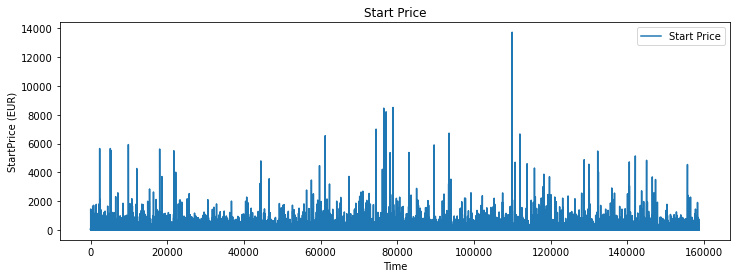

In [10]:
fig = plt.figure()
fig.set_figwidth(12)
plt.plot(eurdata['StartPrice'], label = 'Start Price')
plt.xlabel('Time')
plt.ylabel('StartPrice (EUR)')
plt.legend(loc='upper right')
plt.title('Start Price')
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

series = eurdata.StartPrice.values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -118.47459126691213
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4304248199954612
Critial Values:
   5%, -2.861573069213271
Critial Values:
   10%, -2.566787601594207


<Figure size 72x72 with 0 Axes>

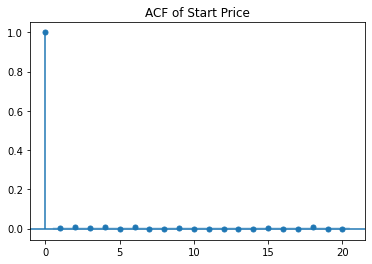

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# create acf plot
plt.figure(figsize=(1, 1))

plot_acf(eurdata['StartPrice'], lags=20)
plt.title("ACF of Start Price")
plt.show()

<Figure size 72x72 with 0 Axes>

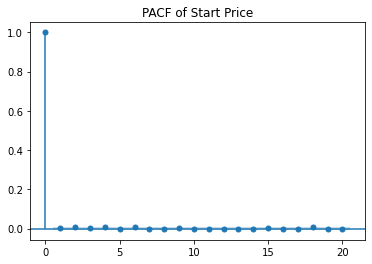

In [13]:
# create pacf plot
plt.figure(figsize=(1, 1))

plot_pacf(eurdata['StartPrice'], lags=20)
plt.title("PACF of Start Price")
plt.show()

Making Data Stationary

In [14]:
from scipy.stats import boxcox

startprice_transformed = boxcox(eurdata.StartPrice, 0)
#returns = pd.DataFrame(np.diff(np.log(eurdata['StartPrice'].values)))*100
returns = 100 * pd.DataFrame(startprice_transformed).pct_change().dropna()
returns = returns.mask(np.isinf(returns))
returns = returns.dropna()

In [91]:
returns = abs(returns)

Text(0.5, 0, 'Time')

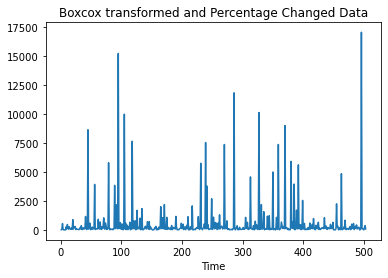

In [92]:
plt.plot(returns[:500])
plt.title("Boxcox transformed and Percentage Changed Absolute Data")
plt.xlabel("Time")

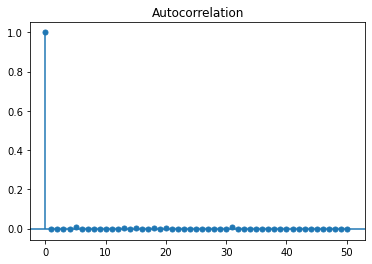

In [93]:
plot_acf(returns**2)
plt.show()

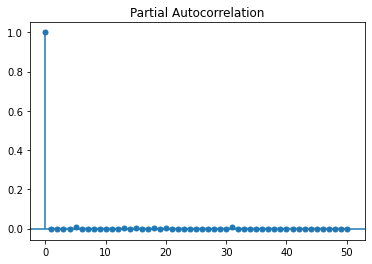

In [17]:
plot_pacf(returns**2)
plt.show()

#### GARCH(3,0) = ARCH(3)

In [18]:
from arch import arch_model
model10 = arch_model(returns, p=3, q=0)
model10_fit = model10.fit()
model10_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 783791.6697158415
Iteration:      2,   Func. Count:     13,   Neg. LLF: 784183.3465597039
Iteration:      3,   Func. Count:     24,   Neg. LLF: 783777.2512826093
Iteration:      4,   Func. Count:     29,   Neg. LLF: 783777.2512437208
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 783777.2512826093
            Iterations: 8
            Function evaluations: 29
            Gradient evaluations: 4


C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -783777.
Distribution:                  Normal   AIC:                       1.56756e+06
Method:            Maximum Likelihood   BIC:                       1.56761e+06
                                        No. Observations:                86801
Date:                Fri, May 06 2022   Df Residuals:                    86800
Time:                        11:26:58   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu           -72.6729     98.597     -0.737      0.461 [-2.659e+02,1.206e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.5902e+06  8.415e+04     18.897  1.208e-79  [1.425e+06,1.755e+06]
alpha[1]       0.0000  1.022e-04      0.000      1.000 [-2.003e-04,2.003e-04]
alpha[2]       1.0000      0.642      1.557      0.119      [ -0.258,  2.258]
alpha[3]   2.1134e-03  6.205e-03      0.341      0.733 [-1.005e-02,1.427e-02]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [74]:
len(returns[-(8600-1):])

8599

In [79]:
warnings.filterwarnings("ignore")
start_time = datetime.now()

rolling_predictions10 = []
test_size10 = 365

for i in range(test_size10):
    train10 = returns[:-(test_size10-i)]
    model10 = arch_model(train10, p=3, q=0)
    model10_fit = model10.fit(disp='off')
    pred10 = model10_fit.forecast(horizon=1)
    rolling_predictions10.append(np.sqrt(pred10.variance.values[-1,:][0]))
end_time = datetime.now()
print("Time taken to execute predictions using 87409 records is ",end_time - start_time, " h:mm:ss")

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

Time taken to execute predictions using 87409 records is  0:01:36.823132  h:mm:ss


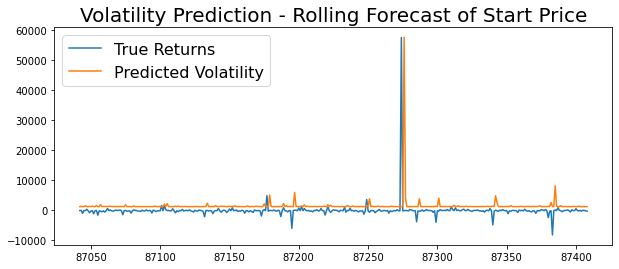

In [80]:
rolling_predictions10 = pd.Series(rolling_predictions10, index=returns.index[-365:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions10)
plt.title('Volatility Prediction - Rolling Forecast of Start Price', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

#### Rerunning the predictions for 60,000 records

In [95]:
model10 = arch_model(returns[-60000:], p=2, q=0)
model10_fit = model10.fit()
model10_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 538589.7948272537
Iteration:      2,   Func. Count:     11,   Neg. LLF: 731317.1706183292
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2254452261.454536
Iteration:      4,   Func. Count:     33,   Neg. LLF: 142178708704.6556
Iteration:      5,   Func. Count:     48,   Neg. LLF: 537101.9398172551
Iteration:      6,   Func. Count:     52,   Neg. LLF: 537101.9398598868
Optimization terminated successfully    (Exit mode 0)
            Current function value: 537101.9398172551
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -537102.
Distribution:                  Normal   AIC:                       1.07421e+06
Method:            Maximum Likelihood   BIC:                       1.07425e+06
                                        No. Observations:                60000
Date:                Fri, May 06 2022   Df Residuals:                    59999
Time:                        18:19:36   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           753.9503     50.019     15.073  2.425e-51 [6.559e+02,8.520e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3648e+06  1.502e+05      9.084  1.043e-19  [1.070e+06,1.659e+06]
alpha[1]       0.0000  3.321e-04      0.000      1.000 [-6.509e-04,6.509e-04]
alpha[2]       1.0000      0.207      4.840  1.298e-06      [  0.595,  1.405]
=============================================================================

Covariance estimator: robust
"""

In [97]:
start_time = datetime.now()

rolling_predictions10 = []
test_size10 = 360

for i in range(test_size10):
    train10 = returns[:-(test_size10-i)]
    model10 = arch_model(train10, p=2, q=0)
    model10_fit = model10.fit(disp='off')
    pred10 = model10_fit.forecast(horizon=1)
    rolling_predictions10.append(np.sqrt(pred10.variance.values[-1,:][0]))
end_time = datetime.now()
print("Time taken to execute predictions using 60000 records is ",end_time - start_time, " h:mm:ss")

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

Time taken to execute predictions using 60000 records is  0:01:40.172163  h:mm:ss


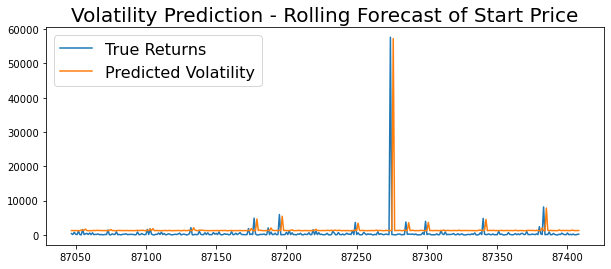

In [98]:
rolling_predictions10 = pd.Series(rolling_predictions10, index=returns.index[-360:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-360:])
preds, = plt.plot(rolling_predictions10)
plt.title('Volatility Prediction - Rolling Forecast of Start Price', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

#### Rerunning the predictions for 40,000 records

In [99]:
model10 = arch_model(returns[-40000:], p=2, q=0)
model10_fit = model10.fit()
model10_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 358794.85208549077
Iteration:      2,   Func. Count:     14,   Neg. LLF: 359038.3587055074
Iteration:      3,   Func. Count:     19,   Neg. LLF: 358678.353944883
Iteration:      4,   Func. Count:     24,   Neg. LLF: 358587.2177891553
Iteration:      5,   Func. Count:     29,   Neg. LLF: 358518.22139655624
Iteration:      6,   Func. Count:     33,   Neg. LLF: 358518.22138734185
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 358518.22139655624
            Iterations: 10
            Function evaluations: 33
            Gradient evaluations: 6


C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -358518.
Distribution:                  Normal   AIC:                           717044.
Method:            Maximum Likelihood   BIC:                           717079.
                                        No. Observations:                40000
Date:                Fri, May 06 2022   Df Residuals:                    39999
Time:                        18:21:30   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           477.6238     28.489     16.765  4.377e-63 [4.218e+02,5.335e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3570e+06  1.099e+05     12.343  5.323e-35  [1.142e+06,1.573e+06]
alpha[1]   4.9954e-04  3.166e-04      1.578      0.115 [-1.209e-04,1.120e-03]
alpha[2]       1.0000      0.232      4.311  1.625e-05      [  0.545,  1.455]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [101]:
start_time = datetime.now()

rolling_predictions10 = []
test_size10 = 360

for i in range(test_size10):
    train10 = returns[:-(test_size10-i)]
    model10 = arch_model(train10, p=2, q=0)
    model10_fit = model10.fit(disp='off')
    pred10 = model10_fit.forecast(horizon=1)
    rolling_predictions10.append(np.sqrt(pred10.variance.values[-1,:][0]))
end_time = datetime.now()
print("Time taken to execute predictions using 40000 records is ",end_time - start_time, " h:mm:ss")

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

Time taken to execute predictions using 40000 records is  0:01:24.499844  h:mm:ss


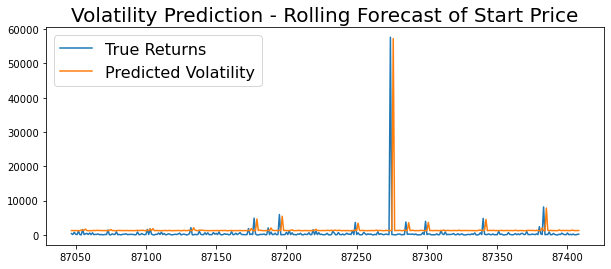

In [102]:
rolling_predictions10 = pd.Series(rolling_predictions10, index=returns.index[-360:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-360:])
preds, = plt.plot(rolling_predictions10)
plt.title('Volatility Prediction - Rolling Forecast of Start Price', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

#### Rerunning the predictions for 20,000 records

In [103]:
model10 = arch_model(returns[-20000:], p=2, q=0)
model10_fit = model10.fit()
model10_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 178967.75426540046
Iteration:      2,   Func. Count:     12,   Neg. LLF: 179066.29034747035
Iteration:      3,   Func. Count:     17,   Neg. LLF: 178971.19693437015
Iteration:      4,   Func. Count:     22,   Neg. LLF: 178961.81290413172
Iteration:      5,   Func. Count:     27,   Neg. LLF: 178950.81388213922
Iteration:      6,   Func. Count:     31,   Neg. LLF: 178950.81388560805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 178950.81388213922
            Iterations: 10
            Function evaluations: 31
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -178951.
Distribution:                  Normal   AIC:                           357910.
Method:            Maximum Likelihood   BIC:                           357941.
                                        No. Observations:                20000
Date:                Fri, May 06 2022   Df Residuals:                    19999
Time:                        18:23:51   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           414.2788     47.769      8.673  4.224e-18 [3.207e+02,5.079e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3346e+06  1.581e+05      8.440  3.187e-17  [1.025e+06,1.644e+06]
alpha[1]       0.0000  2.513e-04      0.000      1.000 [-4.925e-04,4.925e-04]
alpha[2]       1.0000      0.265      3.769  1.640e-04      [  0.480,  1.520]
=============================================================================

Covariance estimator: robust
"""

In [107]:
warnings.filterwarnings("ignore")
start_time = datetime.now()

rolling_predictions10 = []
test_size10 = 360

for i in range(test_size10):
    train10 = returns[:-(test_size10-i)]
    model10 = arch_model(train10, p=2, q=0)
    model10_fit = model10.fit(disp='off')
    pred10 = model10_fit.forecast(horizon=1)
    rolling_predictions10.append(np.sqrt(pred10.variance.values[-1,:][0]))
end_time = datetime.now()
print("Time taken to execute predictions using 20000 records is ",end_time - start_time, " h:mm:ss")

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

Time taken to execute predictions using 20000 records is  0:01:27.221510  h:mm:ss


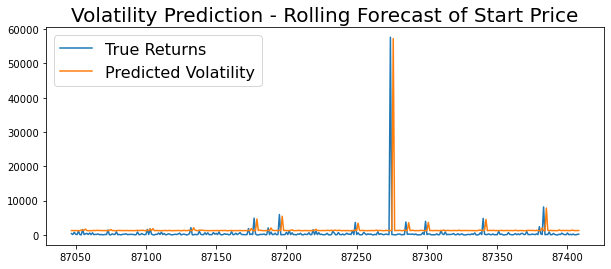

In [108]:
rolling_predictions10 = pd.Series(rolling_predictions10, index=returns.index[-360:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-360:])
preds, = plt.plot(rolling_predictions10)
plt.title('Volatility Prediction - Rolling Forecast of Start Price', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

#### For 100 records

In [109]:
model10 = arch_model(returns[-100:], p=2, q=0)
model10_fit = model10.fit()
model10_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 844.1790325987181
Iteration:      2,   Func. Count:     10,   Neg. LLF: 844.1790338679338
Optimization terminated successfully    (Exit mode 0)
            Current function value: 844.1790325987181
            Iterations: 3
            Function evaluations: 10
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -844.179
Distribution:                  Normal   AIC:                           1696.36
Method:            Maximum Likelihood   BIC:                           1706.78
                                        No. Observations:                  100
Date:                Fri, May 06 2022   Df Residuals:                       99
Time:                        18:27:20   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           353.0877     88.045      4.010  6.064e-05 [1.805e+02,5.257e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.6310e+05  2.111e+05      2.194  2.826e-02  [4.934e+04,8.769e+05]
alpha[1]   2.1129e-11  1.144e-02  1.847e-09      1.000 [-2.242e-02,2.242e-02]
alpha[2]   2.4667e-11  9.678e-03  2.549e-09      1.000 [-1.897e-02,1.897e-02]
=============================================================================

Covariance estimator: robust
"""

In [110]:
start_time =datetime.now()

rolling_predictions10 = []
predictions10 = []
test_size10 = 100

for i in range(test_size10):
    train10 = returns[:-(test_size10-i)]
    model10 = arch_model(train10, p=2, q=0)
    model10_fit = model10.fit(disp='off')
    pred10 = model10_fit.forecast(horizon=1)
    rolling_predictions10.append(np.sqrt(pred10.variance.values[-1,:][0]))
    predictions10.append(pred10.mean.values[-1,:][0])
end_time = datetime.now()
print("Time taken to execute predictions using 100 records is ",end_time - start_time, " h:mm:ss")

C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Chrisia\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

 

Time taken to execute predictions using 100 records is  0:00:25.292846  h:mm:ss


In [52]:
#plt.plot(predictions10)
#predictions10[:-1]

87308    <arch.univariate.base.ARCHModelForecast object...
87309    <arch.univariate.base.ARCHModelForecast object...
87310    <arch.univariate.base.ARCHModelForecast object...
87311    <arch.univariate.base.ARCHModelForecast object...
87312    <arch.univariate.base.ARCHModelForecast object...
                               ...                        
87403    <arch.univariate.base.ARCHModelForecast object...
87404    <arch.univariate.base.ARCHModelForecast object...
87405    <arch.univariate.base.ARCHModelForecast object...
87406    <arch.univariate.base.ARCHModelForecast object...
87407    <arch.univariate.base.ARCHModelForecast object...
Length: 99, dtype: object

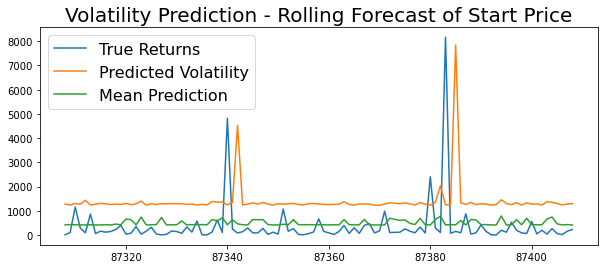

In [111]:
rolling_predictions10 = pd.Series(rolling_predictions10, index=returns.index[-100:])
predictions10 = pd.Series(predictions10, index=returns.index[-100:])

plt.figure(figsize=(10,4))
true, = plt.plot(returns[-100:])
preds, = plt.plot(rolling_predictions10)
preds_mean, = plt.plot(predictions10)
plt.title('Volatility Prediction - Rolling Forecast of Start Price', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility', 'Mean Prediction'], fontsize=16)

In [117]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(returns[-100:], rolling_predictions10[-100:])
mse = metrics.mean_squared_error(returns[-100:], rolling_predictions10[-100:])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(returns[-100:],rolling_predictions10[-100:])
ev_score = metrics.explained_variance_score(returns[-100:], rolling_predictions10)
print("Explained Variance Score is ",ev_score)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Explained Variance Score is  -0.6422750321805772
Results of sklearn.metrics:
MAE: 1271.096747853803
MSE: 2597558.549993291
RMSE: 1611.694310343401
R-Squared: -1.8045182472314218


In [112]:
train = returns
model = arch_model(train, p=2, q=0)
model_fit = model.fit(disp='off')

In [113]:
test_size = 100
rolling_predictions = []
rolling_mean = []
for i in range(test_size):
    train10 = returns[:-(test_size-i)]

    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    rolling_mean.append(pred.mean.values[-1,:][0])


In [114]:
predictions = pd.Series(rolling_predictions, index=returns.index[-100:])
predictions_mean = pd.Series(rolling_mean, index=returns.index[-100:])

Text(0.5, 1.0, 'Volatility Prediction - Next')

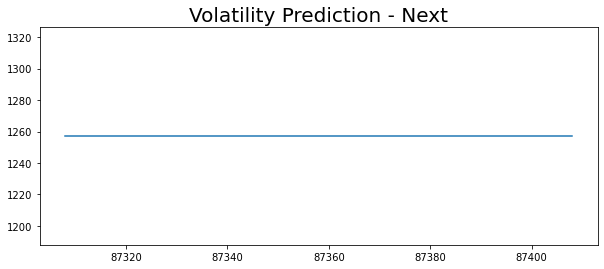

In [115]:
plt.figure(figsize=(10,4))
plt.plot(predictions)
plt.title('Volatility Prediction - Next', fontsize=20)

Text(0.5, 1.0, 'Mean Prediction - Next')

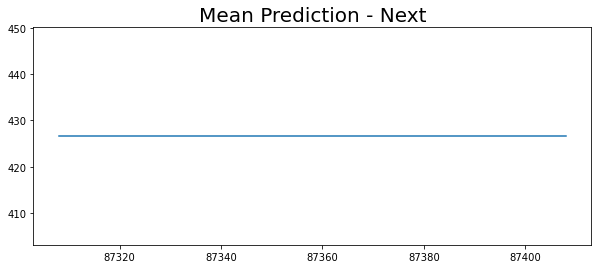

In [116]:
plt.figure(figsize=(10,4))
plt.plot(predictions_mean)
plt.title('Mean Prediction - Next', fontsize=20)

Performance Observations:
1. Time taken to execute GARCH(3,0) predictions using 87409 records is  0:02:43.377924  h:mm:ss
2. Time taken to execute GARCH(3,0) predictions using 60000 records is  0:03:14.027579  h:mm:ss
3. Time taken to execute GARCH(3,0) predictions using 40000 records is  0:02:45.425493  h:mm:ss
4. Time taken to execute GARCH(3,0) predictions using 20000 records is  0:02:37.507237  h:mm:ss
5. Time taken to execute GARCH(3,0) predictions using 500 records is  0:02:24.910581  h:mm:ss
6. Time taken to execute GARCH(3,0) predictions using 100 records is  0:00:32.150042  h:mm:ss



                

In [89]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(returns[-365:], rolling_predictions10)
mse = metrics.mean_squared_error(returns[-365:], rolling_predictions10)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(returns[-365:],rolling_predictions10)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 1891.3738591293597
MSE: 21259016.747056987
RMSE: 4610.750128455997
R-Squared: -1.1668185298519638


In [90]:
ev_score = metrics.explained_variance_score(returns[-365:], rolling_predictions10)
print("Explained Variance Score is ",ev_score)

Explained Variance Score is  -0.9218044014101294


In [83]:
rolling_predictions10[-10:]

87399    1261.106683
87400    1261.099535
87401    1261.092975
87402    1261.114095
87403    1261.079343
87404    1261.082859
87405    1261.067329
87406    1261.070086
87407    1261.055856
87408    1261.044568
dtype: float64

In [39]:
#

In [110]:
!pip install pmdarima

In [33]:
import pmdarima

rolling_predictions_ag = []
#test_size_ag = 365*5
test_size_ag = 200
#train_ag = returns[:-(test_size_ag-i)]

#automatically fit the optimal ARIMA model for given time series
arima_model_fitted = pmdarima.auto_arima(startprice_transformed[:test_size_ag])
# one-step out-of sample forecast
forecast = arima_model_fitted.predict(n_periods=1)[0]

In [35]:
arima_model_fitted

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
forecast

-4.84692784079345

In [55]:
startprice_transformed[:-5]


,0
87384,1.629241
87385,4.025352
87386,0.457425
87387,4.461300
87388,6.091310


In [59]:
#import pmdarima
import statsmodels.tsa.arima_model as stm


rolling_predictions_ag = []
#test_size_ag = 365*5
test_size_ag = 20
smallsample = pd.DataFrame(startprice_transformed[-20:]).dropna()

for i in range(test_size_ag):
    train_ag = smallsample[-(test_size_ag-i):]
    #print(train_ag)
    #automatically fit the optimal ARIMA model for given time series
    #arima_model_fitted = pmdarima.auto_arima(train_ag)
    arima_model_fitted = stm.ARIMA(train_ag, order=(2,0,2))
    # one-step out-of sample forecast
    model_fit = arima_model_fitted.fit()

    #forecast = arima_model_fitted.predict(n_periods=1)[0]
    predicted_mu = model_fit.forecast()[0]
    #p, d, q = arima_model_fitted.order
    #arima_residuals = arima_model_fitted.arima_res_.resid
    arima_residuals = model_fit.resid
    arima_residuals = arima_residuals.dropna()
    #Passing the residuals to GARCH model
    garch = arch_model(arima_residuals, p=1, q=0)
    garch_fitted = garch.fit()
    # Use ARIMA to predict mu
    #predicted_mu = arima_model_fitted.predict(n_periods=1)[0]
    # Use GARCH to predict the residual
    garch_forecast = garch_fitted.forecast(horizon=1)
    predicted_et = garch_forecast.mean['h.1'].iloc[-1]
    # Combine both models' output: yt = mu + et
    prediction = predicted_mu + predicted_et
    rolling_predictions_ag.append(prediction)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 43.626436624319204
Iteration:      2,   Func. Count:     10,   Neg. LLF: 43.81203300292887
Iteration:      3,   Func. Count:     15,   Neg. LLF: 39.95989553260245
Iteration:      4,   Func. Count:     19,   Neg. LLF: 39.83056700463365
Iteration:      5,   Func. Count:     23,   Neg. LLF: 39.80067416561999
Iteration:      6,   Func. Count:     27,   Neg. LLF: 39.790091628560994
Iteration:      7,   Func. Count:     31,   Neg. LLF: 39.789713048679026
Iteration:      8,   Func. Count:     35,   Neg. LLF: 39.78970996177384
Iteration:      9,   Func. Count:     38,   Neg. LLF: 39.78971002647527
Optimization terminated successfully    (Exit mode 0)
            Current function value: 39.78970996177384
            Iterations: 9
            Function evaluations: 38
            Gradient evaluations: 9


C:\Users\Chrisia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Iteration:      1,   Func. Count:      5,   Neg. LLF: 41.43685442320005
Iteration:      2,   Func. Count:     10,   Neg. LLF: 38.86946573038345
Iteration:      3,   Func. Count:     14,   Neg. LLF: 38.30655380316548
Iteration:      4,   Func. Count:     18,   Neg. LLF: 38.280068369305525
Iteration:      5,   Func. Count:     22,   Neg. LLF: 38.27911196579282
Iteration:      6,   Func. Count:     26,   Neg. LLF: 38.27907653397619
Iteration:      7,   Func. Count:     30,   Neg. LLF: 38.27906617823723
Iteration:      8,   Func. Count:     33,   Neg. LLF: 38.279066213200544
Optimization terminated successfully    (Exit mode 0)
            Current function value: 38.27906617823723
            Iterations: 8
            Function evaluations: 33
            Gradient evaluations: 8


C:\Users\Chrisia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Iteration:      1,   Func. Count:      5,   Neg. LLF: 37.790876544735504
Iteration:      2,   Func. Count:     11,   Neg. LLF: 34.556530476523044
Iteration:      3,   Func. Count:     15,   Neg. LLF: 34.363829989952414
Iteration:      4,   Func. Count:     19,   Neg. LLF: 34.32251819652088
Iteration:      5,   Func. Count:     23,   Neg. LLF: 34.321335511033
Iteration:      6,   Func. Count:     27,   Neg. LLF: 34.32075500654415
Iteration:      7,   Func. Count:     31,   Neg. LLF: 34.320754085882875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.320754085882875
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7


C:\Users\Chrisia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Iteration:      1,   Func. Count:      5,   Neg. LLF: 35.921488350611966
Iteration:      2,   Func. Count:     10,   Neg. LLF: 33.30226669305804
Iteration:      3,   Func. Count:     14,   Neg. LLF: 33.0905661307818
Iteration:      4,   Func. Count:     18,   Neg. LLF: 33.011818592418166
Iteration:      5,   Func. Count:     22,   Neg. LLF: 33.000151554678034
Iteration:      6,   Func. Count:     26,   Neg. LLF: 32.99939632042914
Iteration:      7,   Func. Count:     30,   Neg. LLF: 32.99914919455618
Iteration:      8,   Func. Count:     34,   Neg. LLF: 32.999147249269214
Iteration:      9,   Func. Count:     37,   Neg. LLF: 32.99914727916725
Optimization terminated successfully    (Exit mode 0)
            Current function value: 32.999147249269214
            Iterations: 9
            Function evaluations: 37
            Gradient evaluations: 9


C:\Users\Chrisia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


ZeroDivisionError: division by zero

In [121]:
rolling_predictions_ag = pd.Series(rolling_predictions_ag, index=returns.index[-5:])


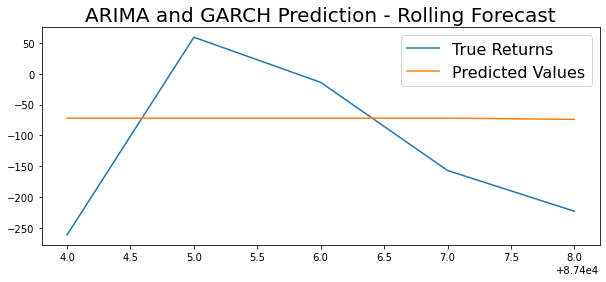

In [122]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-5:])
preds, = plt.plot(rolling_predictions_ag[-5:])
plt.title('ARIMA and GARCH Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Values'], fontsize=16)

In [116]:
rolling_predictions_ag, returns[-5:]

([-72.0334076821079,
  -72.03417917820299,
  -72.04372754131826,
  -72.0306918844301,
  -74.09507894677847],
                 0
 87404 -261.303897
 87405   59.011945
 87406  -14.106773
 87407 -156.872033
 87408 -222.930754)

Time taken to execute predictions using 87409 records is  0:01:36.823132  h:mm:ss
